In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use('dark_background')
%matplotlib inline
import gensim.downloader
from nltk.tokenize import word_tokenize
import sys
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
## Mount Google drive folder if running in Colab
if('google.colab' in sys.modules):
    from google.colab import drive
    drive.mount('/content/drive', force_remount = True)
    DIR = '/content/drive/MyDrive/Colab Notebooks/OddSemester2024/AML/Codes'
    DATA_DIR = DIR+'/Data/'
else:
    DATA_DIR = 'Data/'

Mounted at /content/drive


In [3]:
FILE = DATA_DIR + 'Social_Network_Ads.csv'
data = pd.read_csv(FILE)
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [9]:
X = data.iloc[:, [2,3]].values

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

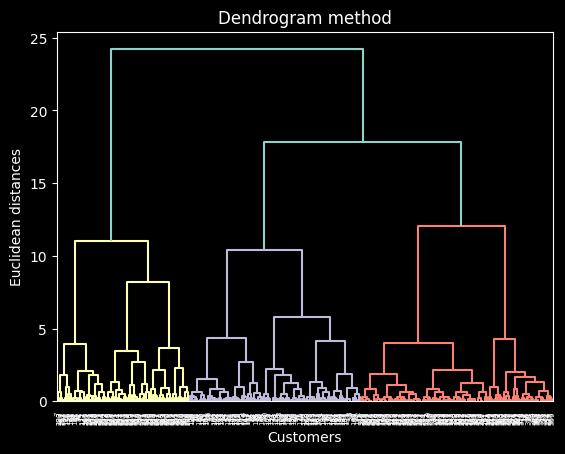

In [11]:
#Dendogram
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method = 'ward'))
plt.title('Dendrogram method')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [12]:
#fitting hc
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X_scaled)

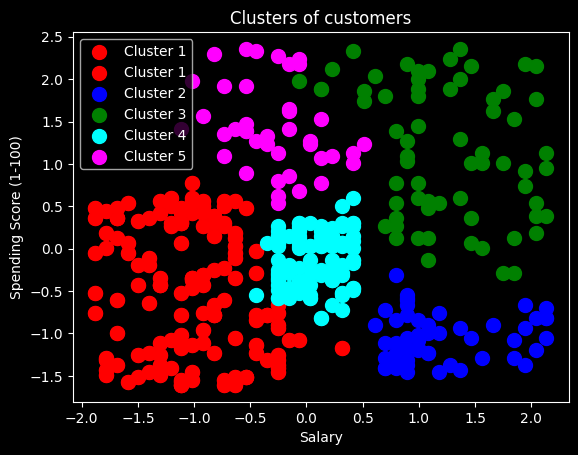

In [13]:
plt.scatter(X_scaled[y_hc == 0, 0], X_scaled[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_scaled[y_hc == 0, 0], X_scaled[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_scaled[y_hc == 1, 0], X_scaled[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_scaled[y_hc == 2, 0], X_scaled[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_scaled[y_hc == 3, 0], X_scaled[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X_scaled[y_hc == 4, 0], X_scaled[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Salary')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()